In [3]:
import pandas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [89]:
pdb_id = '1OPD'

# Input data: sanity check

In [90]:
rmsds = pandas.read_csv(pdb_id + '.rmsd.csv', index_col=0)
rmsds[:3]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
0,7,6,100,2000,PAM30,28.073078
1,5,6,50,2000,PAM30,35.336258
2,7,6,50,2000,BLOSUM62,41.659439


In [91]:
len(rmsds)

48

# Fragment size

In [92]:
rmsds = rmsds.sort(['group_count', 'max_templates', 'max_blast', 'matrix', 'fragment_size'])
rmsds[:6]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
21,5,4,50,2000,BLOSUM62,34.036125
47,7,4,50,2000,BLOSUM62,40.761124
38,9,4,50,2000,BLOSUM62,29.996506
18,5,4,50,2000,PAM30,23.342371
28,7,4,50,2000,PAM30,38.813042
35,9,4,50,2000,PAM30,32.430038


In [93]:
fragment5 = rmsds[rmsds['fragment_size'] == 5]['rmsd']
fragment7 = rmsds[rmsds['fragment_size'] == 7]['rmsd']
fragment9 = rmsds[rmsds['fragment_size'] == 9]['rmsd']

fragment5[:2]

21    34.036125
18    23.342371
Name: rmsd, dtype: float64

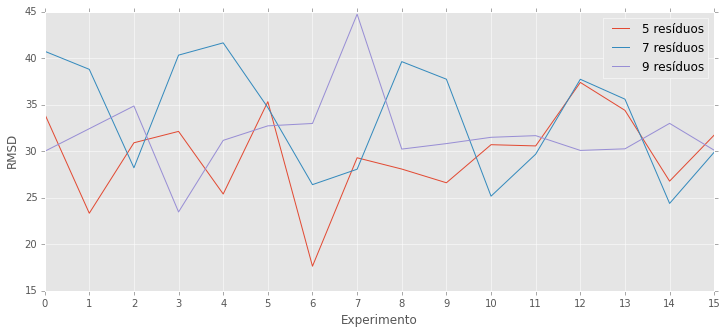

In [94]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(
    1, 1, 1, 
    xlim=(0, len(fragment5) - 1),
    xlabel="Experimento",
    ylabel="RMSD",
    xticks=range(0, len(fragment5))
)

ax.plot(fragment5, label='5 resíduos')
ax.plot(fragment7, label='7 resíduos')
ax.plot(fragment9, label='9 resíduos')

ax.legend()

fig.savefig(pdb_id + '.fragmentsize.comparison.svg', format='svg')

# Number of groups

In [95]:
rmsds = rmsds.sort(['fragment_size', 'max_blast', 'matrix', 'max_templates', 'group_count'])
rmsds[:6]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
21,5,4,50,2000,BLOSUM62,34.036125
32,5,6,50,2000,BLOSUM62,25.408100
24,5,8,50,2000,BLOSUM62,28.091312
7,5,10,50,2000,BLOSUM62,37.404999
22,5,4,100,2000,BLOSUM62,30.915777
11,5,6,100,2000,BLOSUM62,17.643263


In [96]:
grupo4 = rmsds[rmsds['group_count'] == 4]['rmsd']
grupo6 = rmsds[rmsds['group_count'] == 6]['rmsd']
grupo8 = rmsds[rmsds['group_count'] == 8]['rmsd']
grupo10 = rmsds[rmsds['group_count'] == 10]['rmsd']


grupo4[:2]

21    34.036125
22    30.915777
Name: rmsd, dtype: float64

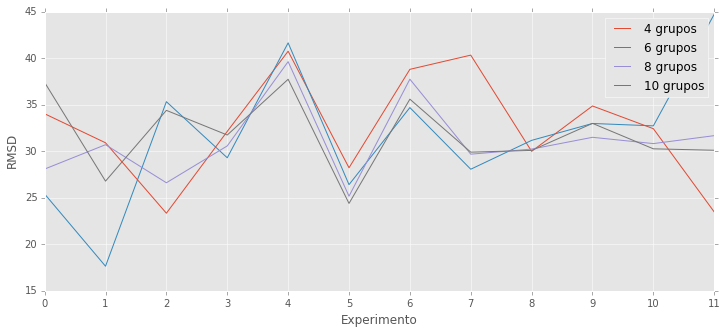

In [97]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(
    1, 1, 1, 
    xlim=(0, len(grupo4) - 1),
    xlabel="Experimento",
    ylabel="RMSD",
    xticks=range(0, len(grupo4))
)

ax.plot(grupo4, label='4 grupos')
ax.plot(grupo6, label='6 grupos')
ax.plot(grupo8, label='8 grupos')
ax.plot(grupo10, label='10 grupos')



ax.legend()

fig.savefig(pdb_id + '.numberofgroups.comparison.svg', format='svg')

# Number of templates

In [103]:
rmsds = rmsds.sort(['fragment_size', 'group_count', 'max_blast', 'matrix', 'max_templates'])
rmsds[:6]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
21,5,4,50,2000,BLOSUM62,34.036125
22,5,4,100,2000,BLOSUM62,30.915777
18,5,4,50,2000,PAM30,23.342371
19,5,4,100,2000,PAM30,32.141014
32,5,6,50,2000,BLOSUM62,25.408100
11,5,6,100,2000,BLOSUM62,17.643263


In [99]:
templates50 = rmsds[rmsds['max_templates'] == 50]['rmsd']
templates100 = rmsds[rmsds['max_templates'] == 100]['rmsd']

templates50[:2]

21    34.036125
18    23.342371
Name: rmsd, dtype: float64

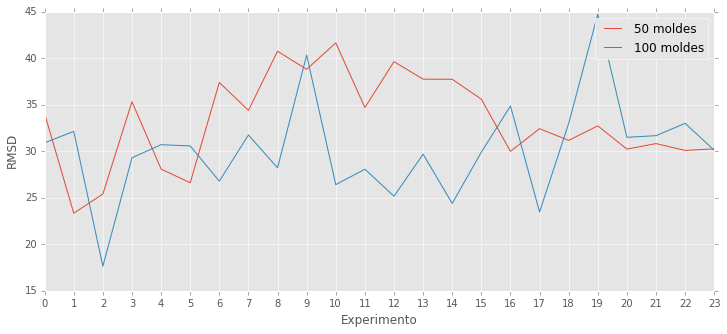

In [100]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(
    1, 1, 1, 
    xlim=(0, len(templates50) - 1),
    xlabel="Experimento",
    ylabel="RMSD",
    xticks=range(0, len(templates50)),
)

ax.plot(templates50, label='50 moldes')
ax.plot(templates100, label='100 moldes')

ax.legend()

fig.savefig(pdb_id +  '.maxtemplates.comparison.svg', format='svg')

# Substitution Matrix

In [101]:
rmsds = rmsds.sort(['fragment_size', 'group_count', 'max_templates', 'max_blast', 'matrix'])
rmsds[:4]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
21,5,4,50,2000,BLOSUM62,34.036125
18,5,4,50,2000,PAM30,23.342371
22,5,4,100,2000,BLOSUM62,30.915777
19,5,4,100,2000,PAM30,32.141014


In [86]:
blosum62 = rmsds[rmsds['matrix'] == 'BLOSUM62']['rmsd']
pam30 = rmsds[rmsds['matrix'] == 'PAM30']['rmsd']
blosum62[:2]

20    21.963106
30    23.248333
Name: rmsd, dtype: float64

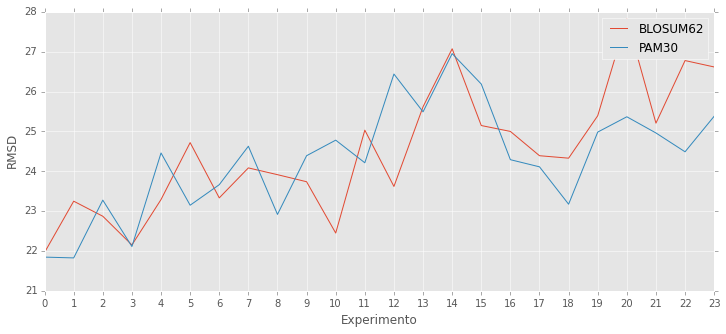

In [102]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(
    1, 1, 1, 
    xlim=(0, len(blosum62) - 1),
    xlabel="Experimento",
    ylabel="RMSD",
    xticks=range(0, len(blosum62)),
)

ax.plot(blosum62, label='BLOSUM62')
ax.plot(pam30, label='PAM30')
ax.legend()

fig.savefig(pdb_id + '.substitutionmatrix.comparison.svg', format='svg')